In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from statistics import median
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.graphics.gofplots import qqplot

import skimage
from skimage import io
from skimage import viewer
from skimage.measure import label, regionprops

D:\Programmes\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
watershed = io.imread("Img/crop1_adipo_avg-watershed.tif", plugin="tifffile")

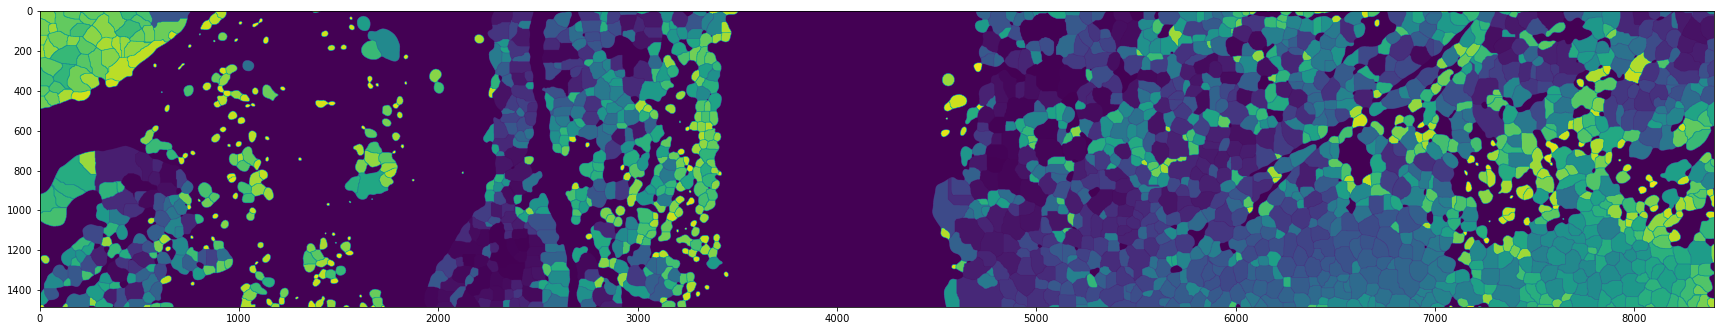

In [3]:
plt.figure(figsize=(30,10))
plt.imshow(watershed)
plt.show()

In [4]:
label_wtshd = label(watershed)
regions = regionprops(label_wtshd)

In [5]:
#### Get Properties

n = len(regions)
x_fascia = 4000

regions_l = []
regions_r = []

x_c_l = []
y_c_l = []

x_c_r = []
y_c_r = []


#### Splitting the regions into 2 groups, left and right from the fascia. 

for props in regions:

    # Getting the centroids
    
    y0, x0 = props.centroid

    cond = x0 < x_fascia
    if (cond):
        x_c_l.append(x0)
        y_c_l.append(y0)
        regions_l.append(props)
        
    else:
        regions_r.append(props)
        x_c_r.append(x0)
        y_c_r.append(y0)
    
areas_l = []
eccent_l = []

#### Getting the wanted properties from the two groups

for props in regions_l:
    
    # Areas
    a = props.area
    areas_l.append(a)
    
    # Eccentricity
    e = props.eccentricity
    eccent_l.append(e)
    
areas_r = []
eccent_r = []

for props in regions_r:
    
    # Areas
    a = props.area
    areas_r.append(a)
    
    # Eccentricity
    e = props.eccentricity
    eccent_r.append(e)

In [23]:
#### Formating Data

Dict_l = {"X_Centroid": x_c_l, "Y_Centroid": y_c_l, "Area": areas_l, "Eccentricity" : eccent_l}
df_l = pd.DataFrame(Dict_l)
df_l

,X_Centroid,Y_Centroid,Area,Eccentricity
0,41.289263,26.062096,3865,0.745537
1,125.493016,59.051830,8663,0.622179
2,162.958569,16.979816,2824,0.886196
3,265.299968,15.902439,3157,0.905756
4,378.827856,41.470166,6268,0.733906
...,...,...,...,...
739,9.169399,1478.781421,183,0.849673
740,538.200542,1478.159892,369,0.948311
741,1671.165414,1479.834586,133,0.859740
742,1537.076923,1479.758242,182,0.929523


In [24]:
Dict_r = {"X_Centroid": x_c_r, "Y_Centroid": y_c_r, "Area": areas_r, "Eccentricity" : eccent_r}
df_r = pd.DataFrame(Dict_r)
df_r

,X_Centroid,Y_Centroid,Area,Eccentricity
0,4736.517200,17.520800,2500,0.812894
1,4811.245582,52.433167,8828,0.486580
2,4871.125055,22.416116,2271,0.332132
3,4960.390146,21.495224,1989,0.476583
4,5011.507109,7.605687,1055,0.966544
...,...,...,...,...
1152,5090.744019,1478.909091,418,0.976219
1153,5225.994545,1478.530909,550,0.983552
1154,7078.701299,1480.857143,77,0.902487
1155,7177.144796,1480.470588,221,0.984177


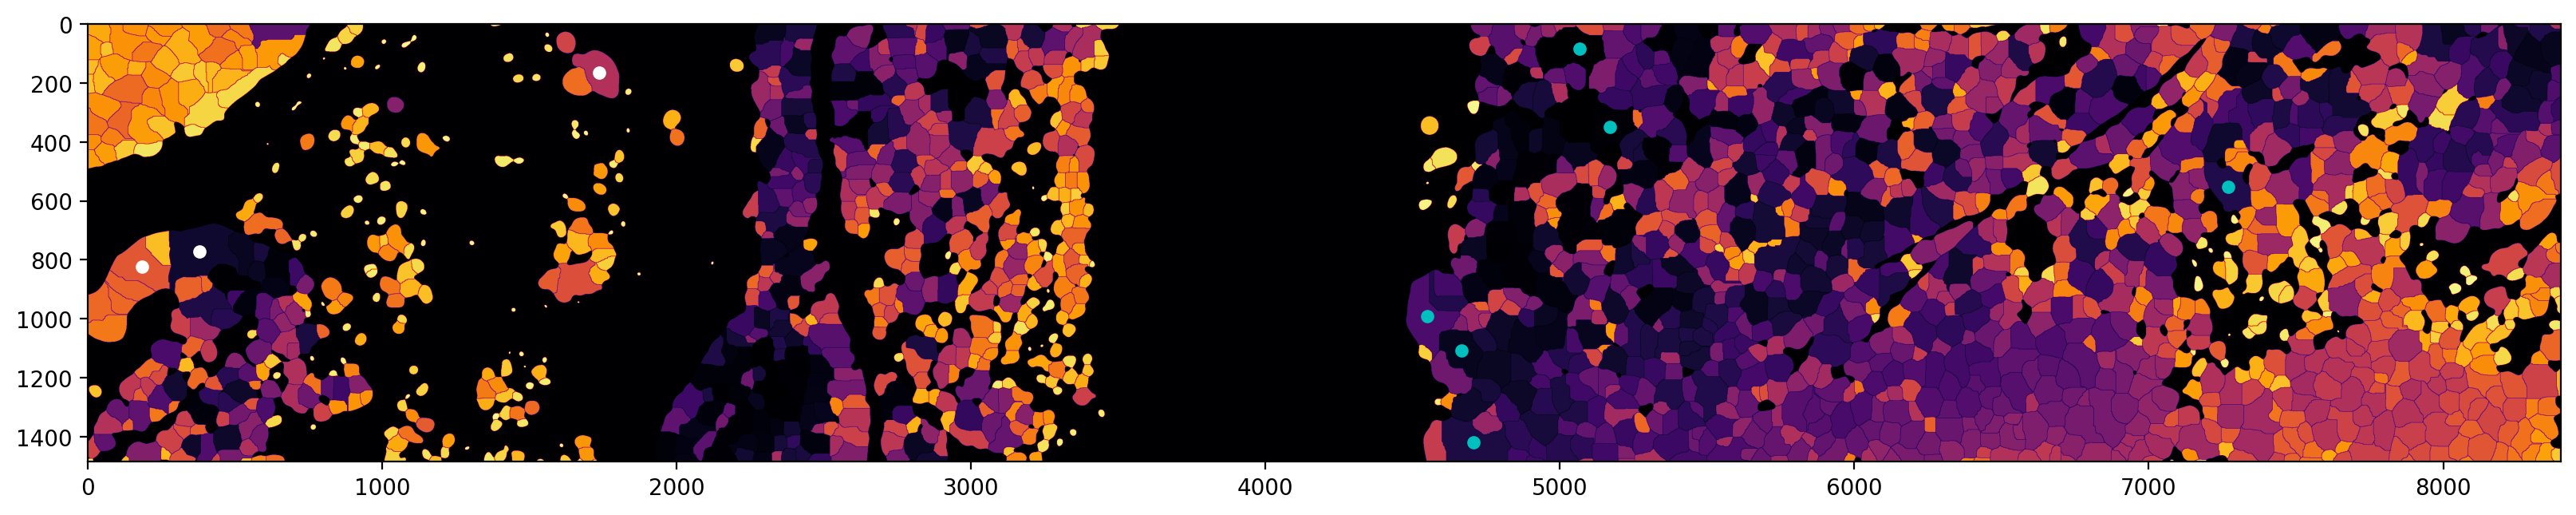

In [25]:
#### Clearing Data

# Locating large regions

large_x_c_r = df_r[df_r['Area'] > 15000]["X_Centroid"]
large_y_c_r = df_r[df_r['Area'] > 15000]["Y_Centroid"]

large_x_c_l = df_l[df_l['Area'] > 15000]["X_Centroid"]
large_y_c_l = df_l[df_l['Area'] > 15000]["Y_Centroid"]

# Ploting them

fig, ax = plt.subplots()
fig.set(figheight = 10)
fig.set(figwidth = 20)
fig.set(dpi = 200)
ax.imshow(watershed, cmap = plt.cm.inferno)

plt.plot(large_x_c_l, large_y_c_l, '.w', markersize = 10)
plt.plot(large_x_c_r, large_y_c_r, '.c', markersize = 10)

plt.show()

In [32]:
df_l = df_l[df_l['Area'] <= 15000]

df_r = df_r[df_r['Area'] <= 15000]

df_r

,X_Centroid,Y_Centroid,Area,Eccentricity
0,4736.517200,17.520800,2500,0.812894
1,4811.245582,52.433167,8828,0.486580
2,4871.125055,22.416116,2271,0.332132
3,4960.390146,21.495224,1989,0.476583
4,5011.507109,7.605687,1055,0.966544
...,...,...,...,...
1152,5090.744019,1478.909091,418,0.976219
1153,5225.994545,1478.530909,550,0.983552
1154,7078.701299,1480.857143,77,0.902487
1155,7177.144796,1480.470588,221,0.984177


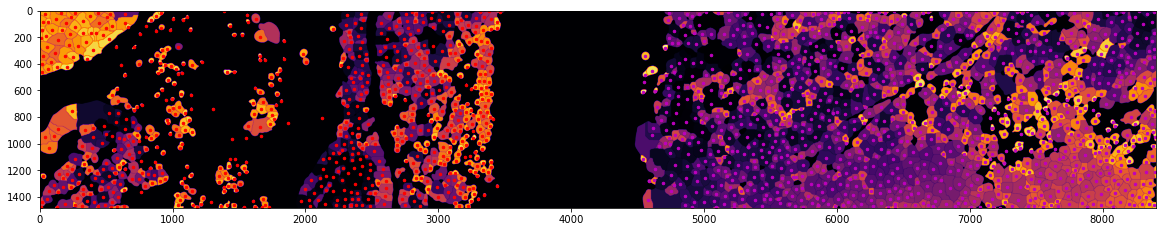

In [34]:
fig, ax = plt.subplots()
fig.set(figheight = 10)
fig.set(figwidth = 20)
ax.imshow(watershed, cmap = plt.cm.inferno)

plt.plot(df_l["X_Centroid"],df_l["Y_Centroid"], '.r', markersize = 5)
plt.plot(df_r["X_Centroid"],df_r["Y_Centroid"], '.m', markersize = 5)

plt.show()

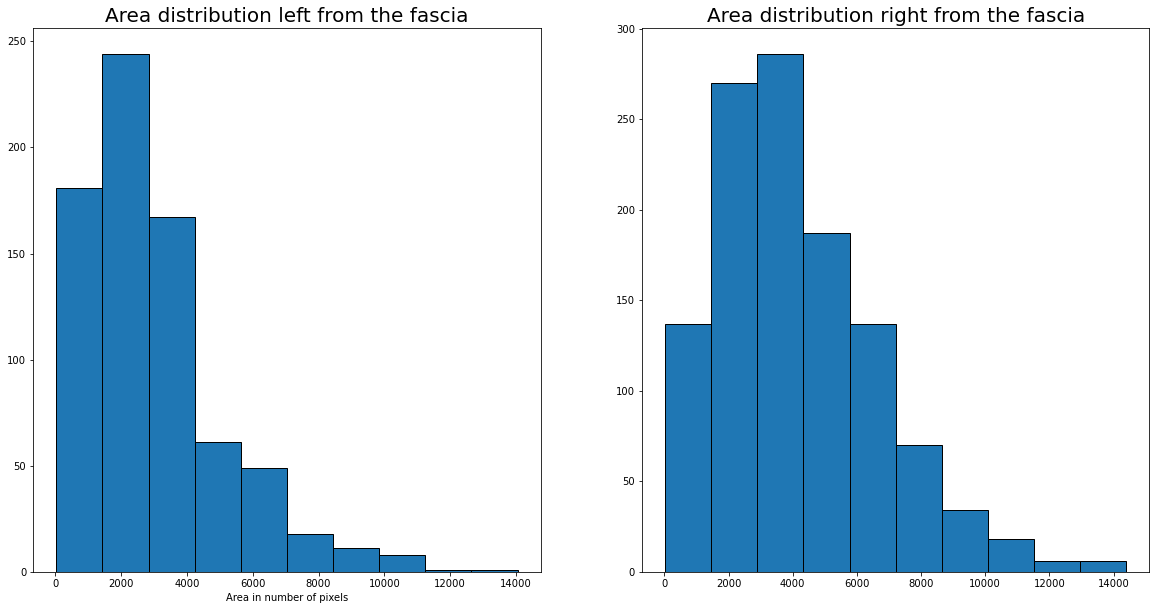

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].hist(df_l["Area"], color = 'tab:blue', edgecolor = 'k')
axs[0].set_title("Area distribution left from the fascia", size=20)
axs[0].set_xlabel("Area in number of pixels")


axs[1].hist(df_r["Area"], color = 'tab:blue', edgecolor = 'k')
axs[1].set_title("Area distribution right from the fascia", size=20)


plt.show()

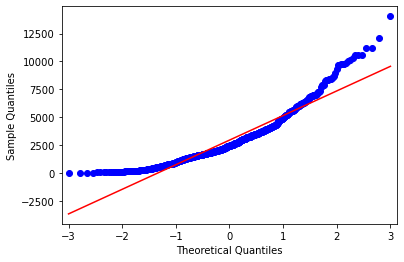

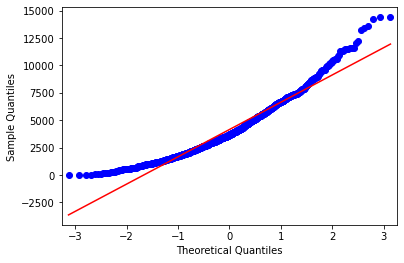

In [38]:
qqplot(np.array(df_l["Area"]), line = 's')
qqplot(np.array(df_r["Area"]), line = 's')
plt.show()

In [13]:
def Average(lst):
    return sum(lst)/len(lst)

In [39]:
Area_Average_l = Average(df_l["Area"])
Area_Median_l = median(df_l["Area"])

Area_Average_r = Average(df_r["Area"])
Area_Median_r = median(df_r["Area"])

print("Aire moyenne des régions à gauche du fascia :", Area_Average_l)
print("Aire moyenne des régions à droite du fascia :", Area_Average_r)

print("\nAire médiane des régions à gauche du fascia :", Area_Median_l)
print("Aire médiane des régions à droite du fascia :", Area_Median_r)

Aire moyenne des régions à gauche du fascia : 2945.1039136302293
Aire moyenne des régions à droite du fascia : 4156.7862728062555

Aire médiane des régions à gauche du fascia : 2423
Aire médiane des régions à droite du fascia : 3673


In [42]:
Eccent_Median_l = median(df_l["Eccentricity"])

Eccent_Median_r = median(df_r["Eccentricity"])

print("Eccentricité médiane des régions à gauche du fascia :", Eccent_Median_l)
print("Eccentricité médiane des régions à droite du fascia :", Eccent_Median_r)


Eccentricité médiane des régions à gauche du fascia : 0.6797371637788023
Eccentricité médiane des régions à droite du fascia : 0.7112838142894085


In [43]:
log_areas_l = np.log(df_l["Area"])
log_areas_r = np.log(df_l["Area"])

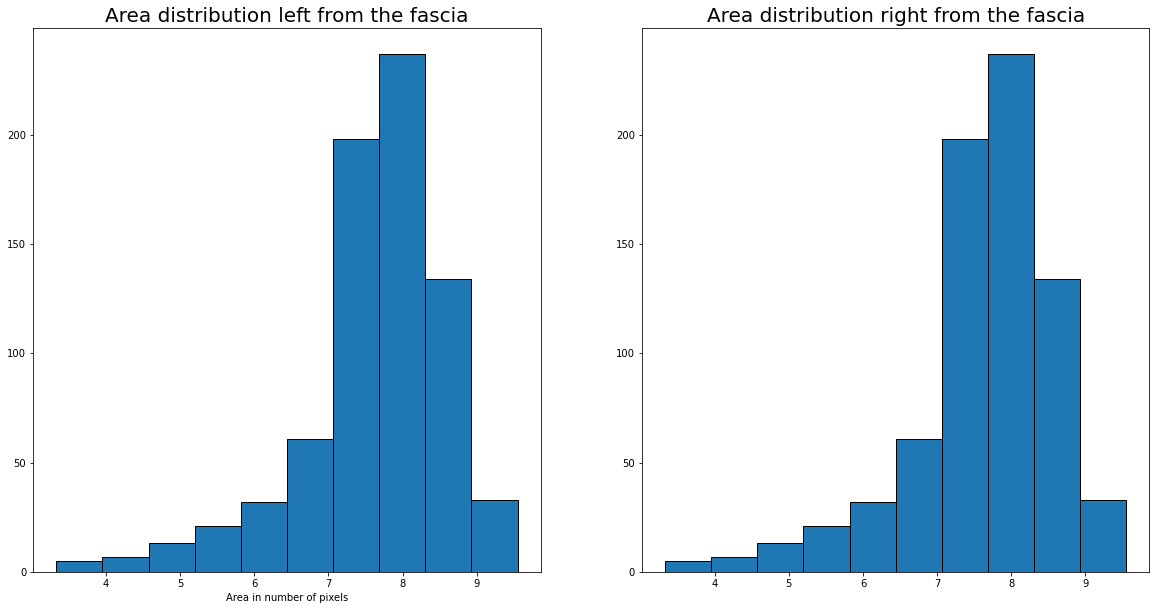

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].hist(log_areas_l, color = 'tab:blue', edgecolor = 'k')
axs[0].set_title("Area distribution left from the fascia", size=20)
axs[0].set_xlabel("Area in number of pixels")


axs[1].hist(log_areas_r, color = 'tab:blue', edgecolor = 'k')
axs[1].set_title("Area distribution right from the fascia", size=20)


plt.show()

In [18]:
stat_shapiro_l, p_shapiro_l = shapiro(log_areas_l)
stat_shapiro_r, p_shapiro_r = shapiro(log_areas_r)

print("p-valeur du test de shapiro sur les aires des régions à gauche du fascia :\n", p_shapiro_l)
print("p-valeur du test de shapiro sur les aires des régions à droite du fascia :\n", p_shapiro_r)

p-valeur du test de shapiro sur les aires des régions à gauche du fascia :
 5.420618597871413e-20
p-valeur du test de shapiro sur les aires des régions à droite du fascia :
 3.455838895363814e-25


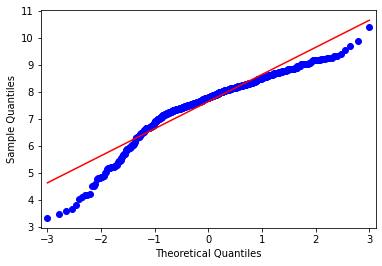

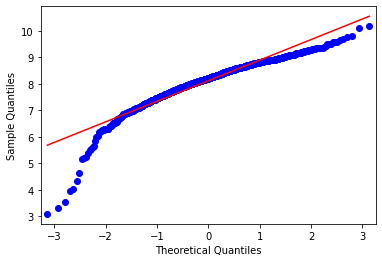

In [19]:
qqplot(log_areas_l, line = 's')
qqplot(log_areas_r, line = 's')
plt.show()

In [20]:
stat_student, p_student = ttest_ind(log_areas_l, log_areas_r)

print("P-valeur du test de student d'égalité des moyennes :\n", p_student)

P-valeur du test de student d'égalité des moyennes :
 7.892811907546716e-30


In [45]:
stat_MWU, p_MWU = mannwhitneyu(df_l["Area"], df_r["Area"])

print("P-valeur du test de Mann-Whitney d'égalité des distributions :\n", p_MWU)

P-valeur du test de Mann-Whitney d'égalité des distributions :
 6.390405216308145e-31
